In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras import layers, models, datasets

import tensorflow_datasets as tfds

ds, ds_info = tfds.load('food101', shuffle_files=True, as_supervised=True, with_info=True)

train_ds, valid_ds = ds["train"], ds["validation"]


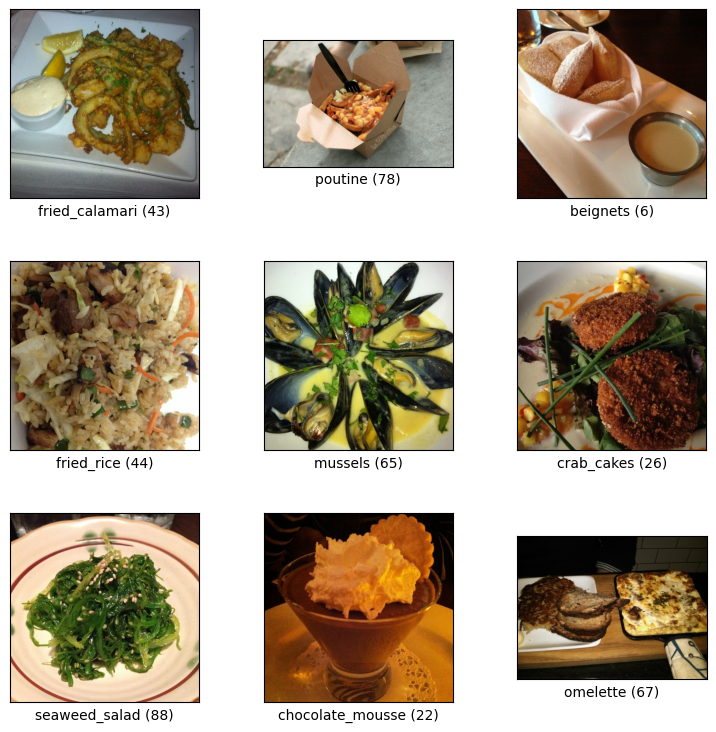

In [68]:
fig = tfds.show_examples(train_ds, ds_info)

In [69]:
MAX_SIZE_LEN = 128
HOT_DOG_CLASS = 55

train_ds = train_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIZE_LEN, MAX_SIZE_LEN]), dtype=tf.int32), tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)

valid_ds = train_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIZE_LEN, MAX_SIZE_LEN]), dtype=tf.int32), tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)

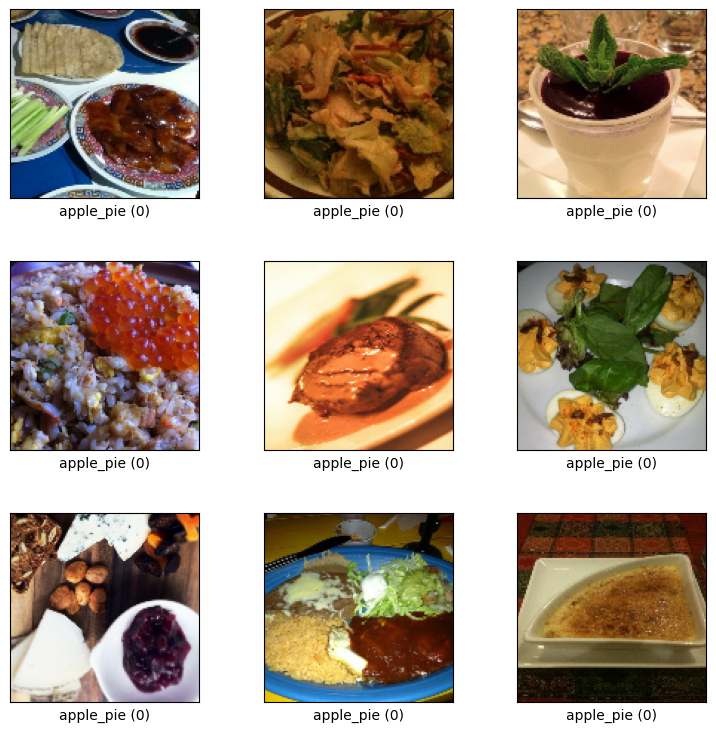

In [70]:
fig = tfds.show_examples(train_ds, ds_info)


In [71]:
train_hd_size, valid_hd_size = 750, 250
train_hotdogs = train_ds.filter(lambda _, label: label == 1).repeat(3)
train_nothotdogs = train_ds.filter(lambda _, label: label == 0)

In [72]:
valid_hotdogs = valid_ds.filter(lambda _, label: label == 1).repeat(3)
valid_nonhotdogs = valid_ds.filter(lambda _, label: label == 0)

In [73]:
valid_hotdogs

<_RepeatDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [74]:
batch_size = 16

train_ds = tf.data.Dataset.sample_from_datasets([train_hotdogs, train_nothotdogs], weights=[0.5, 0.5], stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

valid_ds = tf.data.Dataset.sample_from_datasets([valid_hotdogs, valid_nonhotdogs], weights=[0.5, 0.5], stop_on_empty_dataset=True)
valid_ds = valid_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [75]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch)
    print(label_batch)

tf.Tensor(
[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [101 116 123]
   [124 137 145]
   [141 152 156]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [ 80  95 102]
   [ 94 107 115]
   [107 118 122]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [136 146 147]
   [138 149 153]
   [136 145 142]]

  ...

  [[134  25  28]
   [134  25  28]
   [134  25  28]
   ...
   [158  51  69]
   [159  52  68]
   [160  53  68]]

  [[129  25  24]
   [133  24  26]
   [135  25  27]
   ...
   [154  46  62]
   [157  49  65]
   [160  52  67]]

  [[130  26  22]
   [133  25  23]
   [134  24  23]
   ...
   [155  48  67]
   [157  50  70]
   [159  52  73]]]


 [[[179 155 111]
   [181 158 116]
   [182 159 120]
   ...
   [171 137  91]
   [159 122  79]
   [122  84  37]]

  [[172 148 104]
   [173 148 107]
   [172 149 109]
   ...
   [150 118  64]
   [150 116  59]
   [146 111  49]]

  [[170 143 100]
   [168 142 101]
   [166 141 102]
   ...
   [155 125  64]
   [189 154 108]


2023-07-12 09:26:02.237078: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


# Neural Net Implementation